In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [6]:
from pandas .tseries.offsets import MonthEnd

In [7]:
print(pd.to_datetime('1949-01', format='%Y-%m')+MonthEnd(1))

1949-01-31 00:00:00


In [8]:
df['Month'] = pd.to_datetime(df['Month'], format = '%Y-%m')+MonthEnd(1)

In [9]:
df.head()

,Month,#Passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null datetime64[ns]
#Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [11]:
df.set_index('Month', inplace=True)

In [12]:
df.head()

,#Passengers
Month,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


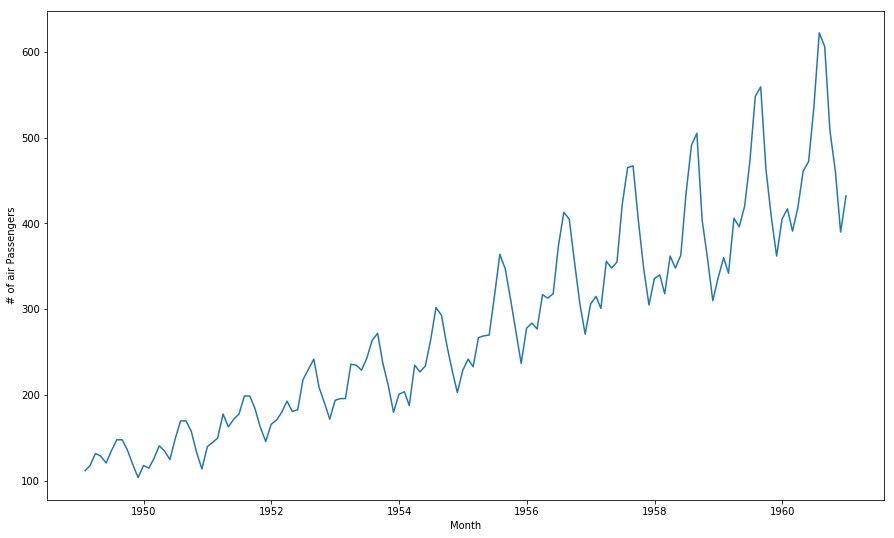

In [13]:
plt.figure(figsize=(15,9))
plt.plot(df['#Passengers'])
plt.xlabel('Month')
plt.ylabel('# of air Passengers')
plt.show()

In [14]:
ts_rolling_mean = df['#Passengers'].rolling(12).mean()
ts_rolling_std = df['#Passengers'].rolling(12).std()

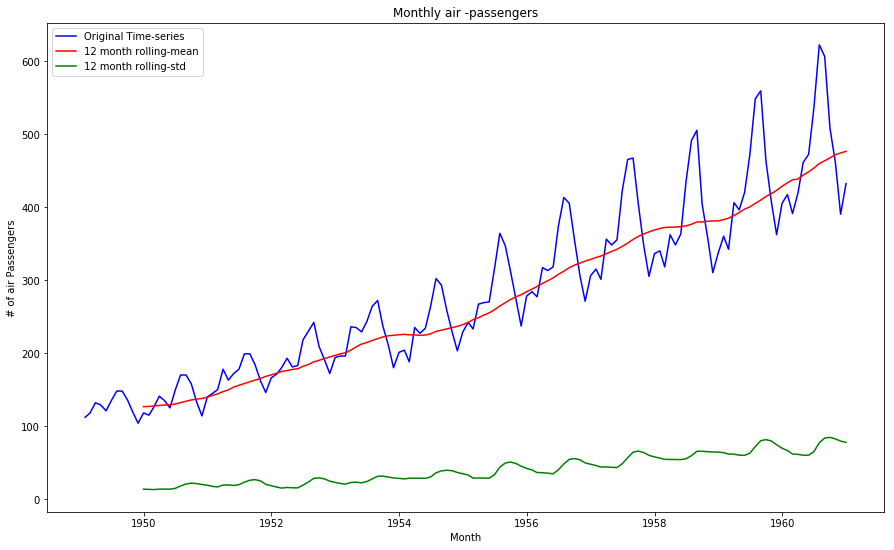

In [15]:
plt.figure(figsize=(15,9))
plt.plot(df['#Passengers'], color='blue', label ='Original Time-series')
plt.plot(ts_rolling_mean, color = 'red', label ='12 month rolling-mean')
plt.plot(ts_rolling_std, color = 'green', label ='12 month rolling-std')
plt.xlabel('Month')
plt.ylabel('# of air Passengers')
plt.title('Monthly air -passengers')
plt.legend(loc='best')
plt.show()

In [16]:
# Null Hypothesis = Non stationary

In [17]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['#Passengers'])

In [18]:
adf_test

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [19]:
print(f'Test Statistics {adf_test[0]}')
print(f'p-value {adf_test[0]}')
print(f'Lags Used {adf_test[0]}')
print(f'No of Observations {adf_test[0]}')

Test Statistics 0.8153688792060543
p-value 0.8153688792060543
Lags Used 0.8153688792060543
No of Observations 0.8153688792060543


In [20]:
df['#Passengers'].shift(1)[0:5]

Month
1949-01-31      NaN
1949-02-28    112.0
1949-03-31    118.0
1949-04-30    132.0
1949-05-31    129.0
Name: #Passengers, dtype: float64

In [21]:
df['#Passengers'].shift(2)[0:5]

Month
1949-01-31      NaN
1949-02-28      NaN
1949-03-31    112.0
1949-04-30    118.0
1949-05-31    132.0
Name: #Passengers, dtype: float64

In [22]:
# here p value is > 0.005, so we will accept the nulll hypothesis and hence the time series is non stationary

In [23]:
nshifts = 1
ts_airp = df['#Passengers'] - df['#Passengers'].shift(nshifts)
adfuller(ts_airp[nshifts:])[1]

0.054213290283824954

In [24]:
nshifts = 2
ts_airp = df['#Passengers'] - df['#Passengers'].shift(nshifts)
adfuller(ts_airp[nshifts:])[1]

0.03862975767698741

In [25]:
# so here after sencond  degree differencing we get p - vaue = 0.0386 which is < 0.05
# henec i can reject the null hypothesis and say that my time series is now stationary

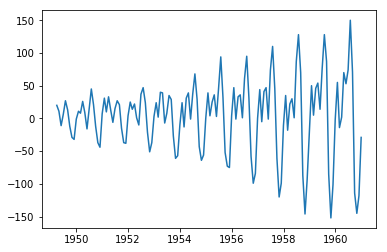

In [26]:
plt.plot(ts_airp)

In [27]:
ts_airp_rolling_mean = ts_airp.rolling(12).mean()
ts_airp_rolling_std = ts_airp.rolling(12).std()

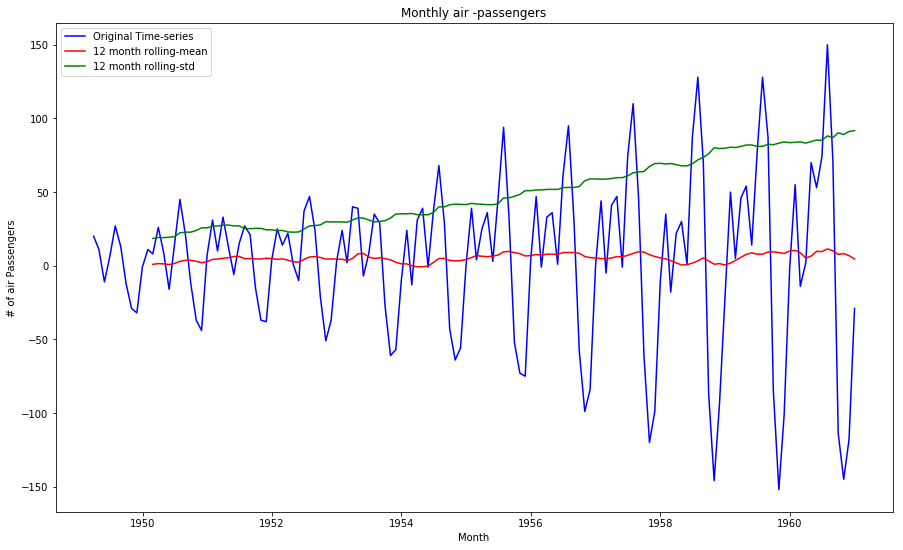

In [28]:
plt.figure(figsize=(15,9))
plt.plot(ts_airp, color='blue', label ='Original Time-series')
plt.plot(ts_airp_rolling_mean, color = 'red', label ='12 month rolling-mean')
plt.plot(ts_airp_rolling_std, color = 'green', label ='12 month rolling-std')
plt.xlabel('Month')
plt.ylabel('# of air Passengers')
plt.title('Monthly air -passengers')
plt.legend(loc='best')
plt.show()

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
decompose_airp = seasonal_decompose(df['#Passengers'])

Text(0.5, 1.0, 'Air Passengers Trend')

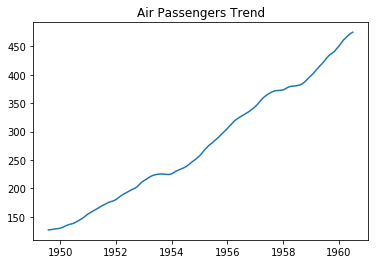

In [31]:
plt.plot(decompose_airp.trend)
plt.title('Air Passengers Trend')

Text(0.5, 1.0, 'Air Passengers Seasonal')

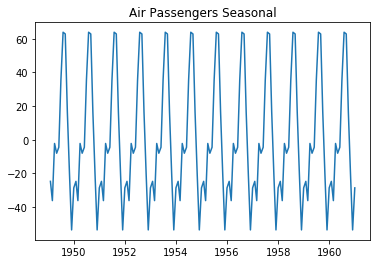

In [32]:
plt.plot(decompose_airp.seasonal)
plt.title('Air Passengers Seasonal')

Text(0.5, 1.0, 'Air Passengers residual')

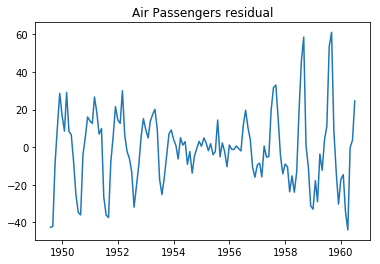

In [33]:
plt.plot(decompose_airp.resid)
plt.title('Air Passengers residual')

In [34]:
df.head()

,#Passengers
Month,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [35]:
df_airp  = df.copy()

In [36]:
df_airp.head()

,#Passengers
Month,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [37]:
df_airp['p-1'] = df_airp.shift(1)

In [38]:
df_airp.head()

,#Passengers,p-1
Month,,
1949-01-31,112,NaN
1949-02-28,118,112.0
1949-03-31,132,118.0
1949-04-30,129,132.0
1949-05-31,121,129.0


In [39]:
ts_airp

Month
1949-01-31      NaN
1949-02-28      NaN
1949-03-31     20.0
1949-04-30     11.0
1949-05-31    -11.0
1949-06-30      6.0
1949-07-31     27.0
1949-08-31     13.0
1949-09-30    -12.0
1949-10-31    -29.0
1949-11-30    -32.0
1949-12-31     -1.0
1950-01-31     11.0
1950-02-28      8.0
1950-03-31     26.0
1950-04-30      9.0
1950-05-31    -16.0
1950-06-30     14.0
1950-07-31     45.0
1950-08-31     21.0
1950-09-30    -12.0
1950-10-31    -37.0
1950-11-30    -44.0
1950-12-31      7.0
1951-01-31     31.0
1951-02-28     10.0
1951-03-31     33.0
1951-04-30     13.0
1951-05-31     -6.0
1951-06-30     15.0
              ...  
1958-07-31    128.0
1958-08-31     70.0
1958-09-30    -87.0
1958-10-31   -146.0
1958-11-30    -94.0
1958-12-31    -22.0
1959-01-31     50.0
1959-02-28      5.0
1959-03-31     46.0
1959-04-30     54.0
1959-05-31     14.0
1959-06-30     76.0
1959-07-31    128.0
1959-08-31     87.0
1959-09-30    -85.0
1959-10-31   -152.0
1959-11-30   -101.0
1959-12-31     -2.0
1960-01-31    

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

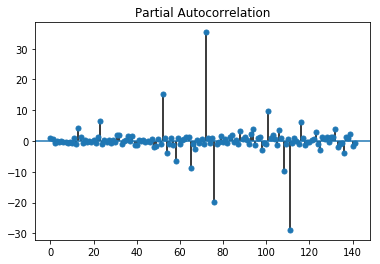

In [41]:
plot_pacf(ts_airp[nshifts:],)
plt.show()

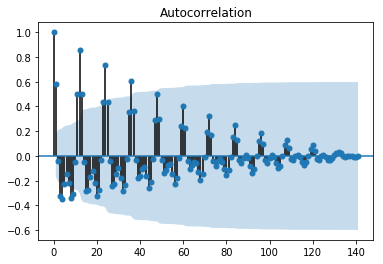

In [42]:
plot_acf(ts_airp[nshifts:],)
plt.show()

In [43]:
df.tail(12)

,#Passengers
Month,
1960-01-31,417
1960-02-29,391
1960-03-31,419
1960-04-30,461
1960-05-31,472
1960-06-30,535
1960-07-31,622
1960-08-31,606
1960-09-30,508


In [44]:
# training data lets put any data before 1960 31st jan
# testing data , any data after 1960 31st jan

In [45]:
df_train = df[df.index < pd.to_datetime('1960-01-31')]
df_test = df[df.index >= pd.to_datetime('1960-01-31')]

In [46]:
df_test

,#Passengers
Month,
1960-01-31,417
1960-02-29,391
1960-03-31,419
1960-04-30,461
1960-05-31,472
1960-06-30,535
1960-07-31,622
1960-08-31,606
1960-09-30,508


In [47]:
df_train.tail()

,#Passengers
Month,
1959-08-31,559
1959-09-30,463
1959-10-31,407
1959-11-30,362
1959-12-31,405


In [48]:
from statsmodels.tsa.arima_model import ARIMA

In [49]:
model_airp = ARIMA(endog = df_train['#Passengers'], order = [1,2,1], freq='M')
result = model_airp.fit()

In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.#Passengers   No. Observations:                  130
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -628.931
Method:                       css-mle   S.D. of innovations             30.042
Date:                Sat, 09 Oct 2021   AIC                           1265.862
Time:                        10:23:18   BIC                           1277.332
Sample:                    03-31-1949   HQIC                          1270.522
                         - 12-31-1959                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0027      0.098      0.028      0.978      -0.189       0.195
ar.L1.D2.#Passengers     0.2979      0.085      3.514      0.001       0.132       0.464
ma.L1.D2.#Passengers    -1.0000      0.019    -52.224      0.000      -1.038      -0.962
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.3565           +0.0000j            3.3565            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [51]:
pred_val = result.forecast(12)[0]
pred_val

array([419.1919056 , 424.80292001, 427.85932787, 430.15653837,
       432.22945725, 434.23744881, 436.2279924 , 438.21523354,
       440.2033866 , 442.19370716, 444.1865693 , 446.18208446])

In [52]:
df_test

,#Passengers
Month,
1960-01-31,417
1960-02-29,391
1960-03-31,419
1960-04-30,461
1960-05-31,472
1960-06-30,535
1960-07-31,622
1960-08-31,606
1960-09-30,508


In [53]:
pip install scikit-learn==0.24

Note: you may need to restart the kernel to use updated packages.


In [54]:
from sklearn.metrics import mean_absolute_percentage_error

In [58]:
1-mean_absolute_percentage_error(pred_val,df_test['#Passengers'].values )

0.8616393307248695

In [59]:
# model is giving almost 86% accuracy